<a href="https://colab.research.google.com/github/MohammadSarim/CardioVascular-Risk-Prediction/blob/main/Capstone_Project_Cardio_Vascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name    - CardioVascular Risk Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Team
##### **Team Member 1 -** Mohmmad Sarim
##### **Team Member 2 -** Arushi Saxena


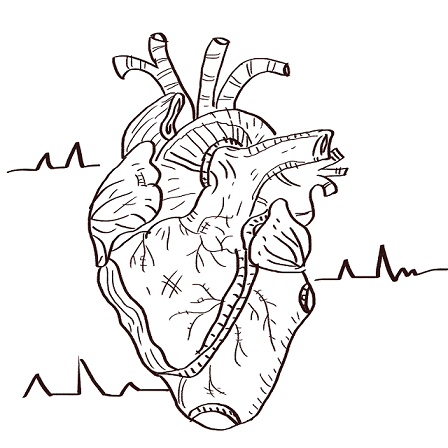

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/MohammadSarim/CardioVascular-Risk-Prediction

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# **Let's Begin !**

## **1. Know Your Data**

### Import Libraries

In [1]:
# Import Libraries
# Import Libraries
# For data visualisation
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

# For feature engineering ans selection 
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2  #feature selection for classification
from sklearn.metrics import recall_score    #to measure model performance

# Machine learning model selection and implementation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Importing classification metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score

# To create table
from prettytable import PrettyTable

# importing missingo library which helps us to visualize the missing values
import missingno as msno

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Load Dataset
file_path = '/content/drive/My Drive/dataset/data_cardiovascular_risk.csv'
Cardio_DataFrame = pd.read_csv(file_path)

### Dataset First View

In [4]:
# Dataset First Look
Cardio_DataFrame.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
Cardio_DataFrame.shape

(3390, 17)

### Dataset Information

In [6]:
# Dataset Info
Cardio_DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
len(Cardio_DataFrame[Cardio_DataFrame.duplicated()])

0

Above, we can obvserved that there are no duplicates values in the our dataset.

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
print(Cardio_DataFrame.isnull().sum())

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64


In [9]:
# Check Unique Values for each variable in Play Store DataFrame.
def unique_value():
  Cardio_content = pd.DataFrame(index=Cardio_DataFrame.columns)
  Cardio_content['Data Type'] = Cardio_DataFrame.dtypes
  Cardio_content['Not Null Values']=Cardio_DataFrame.count()
  Cardio_content['Number of Null Values'] = Cardio_DataFrame.isnull().sum()
  Cardio_content["% of the null value"]=Cardio_DataFrame.isnull().mean().round(4)*100
  Cardio_content['Unique Values'] = Cardio_DataFrame.nunique()
  return Cardio_content 

In [10]:
unique_value()

,Data Type,Not Null Values,Number of Null Values,% of the null value,Unique Values
id,int64,3390,0,0.00,3390
age,int64,3390,0,0.00,39
education,float64,3303,87,2.57,4
sex,object,3390,0,0.00,2
is_smoking,object,3390,0,0.00,2
cigsPerDay,float64,3368,22,0.65,32
BPMeds,float64,3346,44,1.30,2
prevalentStroke,int64,3390,0,0.00,2
prevalentHyp,int64,3390,0,0.00,2
diabetes,int64,3390,0,0.00,2




* **Education** has 87 null values which contributes **2.57%** of the data.

* **cigsPerDay** has 22 null value which contributes **0.65%** of the data. 

* **BPMeds** has 44 null value which contributes **1.30%** of the data. 

* **totChol** has 38 null values which contributes **1.12%** of the data.

* **BMI** has 14 null values which contributes **0.41%** of the data. 

* **heartRate** has 1 null value which contributes **0.03%** of the data.

* **glucose** has 304 null values which contributes **8.97%** of the data.

<Axes: >

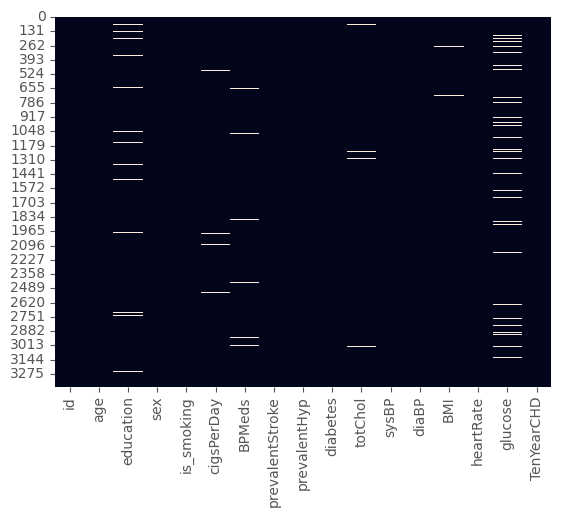

In [11]:
# Visualizing the missing values
sns.heatmap(Cardio_DataFrame.isnull(), cbar=False)

### What did you know about your dataset?

We have observed the following points in our dataset.

* The dataset contains 3390 number of rows and 17 columns.
* There are no duplicate values in the dataset.
* All the columns in the dataset are of numeric type except two columns that is **"sex"** and **"is_smoking"**.
* There are missing values in the datasets and the contribution of those missing values in the dataset as follow.
  
  * **Education** has 87 null values which contributes **2.57%** of the data.

  * **cigsPerDay** has 22 null value which contributes **0.65%** of the data. 

  * **BPMeds** has 44 null value which contributes **1.30%** of the data. 

  * **totChol** has 38 null values which contributes **1.12%** of the data.

  * **BMI** has 14 null values which contributes **0.41%** of the data. 

  * **heartRate** has 1 null value which contributes **0.03%** of the data.

  * **glucose** has 304 null values which contributes **8.97%** of the data.

## **2. Understanding Your Variables**




In [12]:
# Dataset Columns
print(Cardio_DataFrame.columns)

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


In [13]:
# Dataset Describe
Cardio_DataFrame.describe(include='all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


### Variables Description 

Let us first define what information the columns contain based on our inspection.

* **Sex**: male or female("M" or "F")
* **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral
* **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")
* **Cigs_Per_Day**: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
* **BP_Meds**: whether or not the patient was on blood pressure medication (Nominal)
* **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)
* **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)
* **Diabetes**: whether or not the patient had diabetes (Nominal)
Medical(current)
* **Tot Chol**: total cholesterol level (Continuous)
* **Sys BP**: systolic blood pressure (Continuous)
* **Dia BP**: diastolic blood pressure (Continuous)
* **BMI**: Body Mass Index (Continuous)
* **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* **Glucose**: glucose level (Continuous)
Predict variable (desired target)
* **TenYearCHD**: (binary: “1”, means “Yes”, “0” means “No”)

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
print(f"The number of unique values in: ")
print("-"*35)
for i in Cardio_DataFrame.columns:
  print(f"'{i}' : {Cardio_DataFrame[i].nunique()}")

The number of unique values in: 
-----------------------------------
'id' : 3390
'age' : 39
'education' : 4
'sex' : 2
'is_smoking' : 2
'cigsPerDay' : 32
'BPMeds' : 2
'prevalentStroke' : 2
'prevalentHyp' : 2
'diabetes' : 2
'totChol' : 240
'sysBP' : 226
'diaBP' : 142
'BMI' : 1259
'heartRate' : 68
'glucose' : 132
'TenYearCHD' : 2


## **3. Data Wrangling**

### Data Wrangling Code

To impute null values using statistical measures such as mean, median, or mode, the following steps are typically followed:

1. Distribution of data: The distribution of the data is assessed to determine its shape and characteristics. This helps in understanding the nature of the data and choosing the appropriate statistical measure for imputation.

2. Outliers in the data: Outliers, if present, can significantly affect the statistical measures used for imputation. It is important to identify and handle outliers appropriately before proceeding with imputation.

3. Selection of imputation method: Based on the distribution of data and the presence of outliers, an appropriate imputation method is chosen. For example:
   - **Mean imputation:** This method replaces null values with the mean of the non-null values in the same column.
   - **Median imputation:** This method replaces null values with the median of the non-null values in the same column.
   - **Mode imputation:** This method replaces null values with the mode (most frequently occurring value) of the non-null values in the same column.



In [15]:
# Dropping the first id column 
Cardio_DataFrame.drop(['id'] , axis = 1)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


<Axes: >

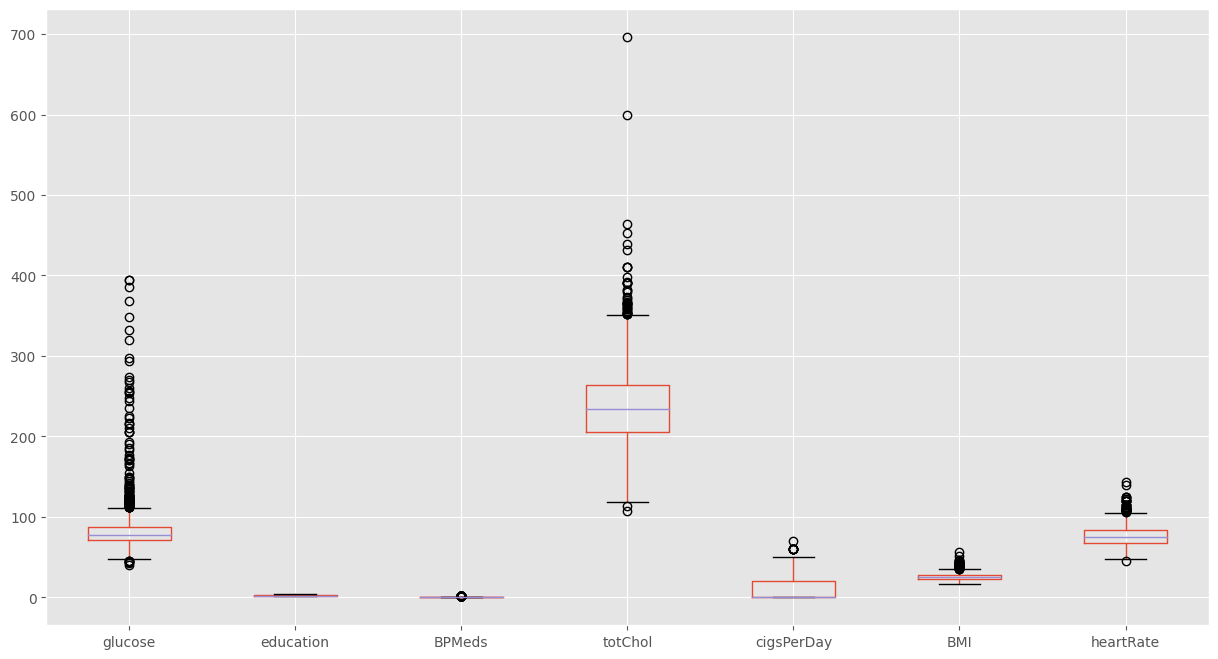

In [16]:
# Plotting the box plot and observe the outliers in the columns having null values

# Creating a list of columns having null values in it.
Null_Values_Columns_list = ['glucose','education','BPMeds','totChol','cigsPerDay','BMI','heartRate']

plt.figure(figsize=(15,8))
Cardio_DataFrame[Null_Values_Columns_list].boxplot()

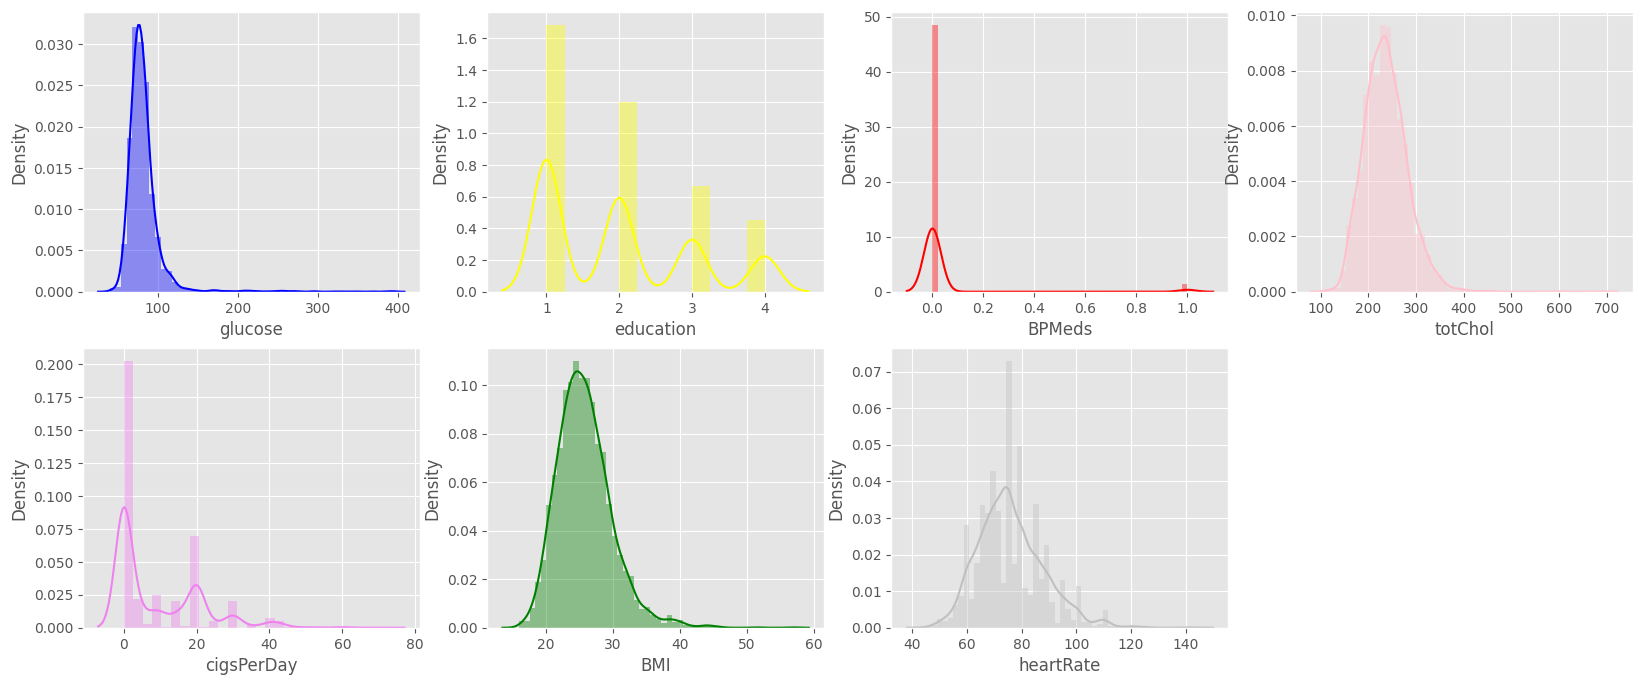

In [17]:
# Plotting the frequency distribution plot for checking the distribution of each feature that contains null values
plt.figure(figsize=(20,8))
colour= ['blue','yellow','red','pink','violet','green','silver','lime']
for i,j in zip(Null_Values_Columns_list, colour):
  ax= plt.subplot(2,4,Null_Values_Columns_list.index(i)+1)
  sns.distplot(Cardio_DataFrame[i],color=j)
plt.show()

We know that

- **Mean:** The mean is commonly used when dealing with numerical data that follows a normal distribution and does not contain any significant outliers. It provides a measure of central tendency by calculating the average value of the data.

- **Median:** The median is preferred when working with numerical data that is continuous and may contain extreme values or outliers. It represents the middle value in a sorted dataset and is less affected by extreme values, making it a robust measure of central tendency.

- **Mode:** The mode is suitable for categorical data, which consists of distinct categories or groups. It represents the most frequently occurring value or category within the dataset. The mode is particularly useful for identifying the most common response or category in a set of data.


Now, by checking the outliers and the distribution of the datase we can impute the missing values as follow:

**"glucose"** - Median

**"education"** - Mode

**"BPMeds"** - Mode

**"totChol"** - Median

**"cigsPerDay"** - Mean

**"BMI"** - Median

**"heartRate"** - Median

In [18]:
# Filling up the NaN values of each feature
Cardio_DataFrame['glucose'].fillna(Cardio_DataFrame['glucose'].median(), inplace=True)
Cardio_DataFrame['education'].fillna(Cardio_DataFrame['education'].mode()[0], inplace=True)
Cardio_DataFrame['BPMeds'].fillna(Cardio_DataFrame['BPMeds'].mode()[0], inplace=True)
Cardio_DataFrame['totChol'].fillna(Cardio_DataFrame['totChol'].median(), inplace=True)
Cardio_DataFrame['cigsPerDay'].fillna(Cardio_DataFrame['cigsPerDay'].mean(), inplace=True)
Cardio_DataFrame['BMI'].fillna(Cardio_DataFrame['BMI'].median(), inplace=True)
Cardio_DataFrame['heartRate'].fillna(Cardio_DataFrame['heartRate'].median(), inplace=True)

In [19]:
# Rechecking the null values in the dataset after imputing with different statistical values
Cardio_DataFrame.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### What all manipulations have you done and insights you found?


- **glucose, totChol, BMI, and heartRate:** These features contain a high number of outliers, so we have decided to replace their null values with the median. The median is a robust measure of central tendency that is less affected by extreme values. By using the median, we can impute the missing values without being influenced by the outliers.

- **education and BPMeds:** Since these features are categorical in nature, we have replaced their null values with the mode. The mode represents the most frequently occurring category or value within the dataset. By using the mode, we ensure that the imputed values align with the dominant categories in the data.

- **cigsPerDay:** This feature has a median value of zero and contains fewer outliers compared to other numerical features. Therefore, we have chosen to replace the null values within CigsPerDay with the mean. The mean provides a measure of central tendency that considers all the available values, including zero. By using the mean, we estimate the average value for the missing entries in CigsPerDay.


## **4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

In [20]:
# Creating a function which will return two lists having categorical and continuous columns.

def seperator():
  categorical_variables = []
  continuous_variables = []
  for i in Cardio_DataFrame.columns:
    if i == 'id':
      pass
    elif Cardio_DataFrame[i].nunique() <10:
      categorical_variables.append(i)
    elif Cardio_DataFrame[i].nunique() >= 10:
      continuous_variables.append(i)
  return categorical_variables,continuous_variables

In [21]:
# calling the separtor function to get the list.
categorical_variables,continuous_variables = seperator()

In [22]:
# Checking the definded lists
print(categorical_variables)
print(continuous_variables)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


### Univariate Analysis

#### Chart - 1- Analyzing the distribution of the continuous independent variables

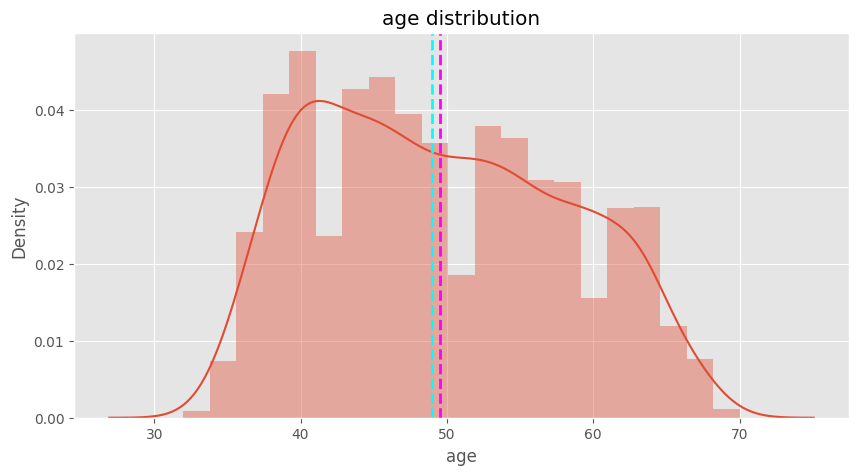

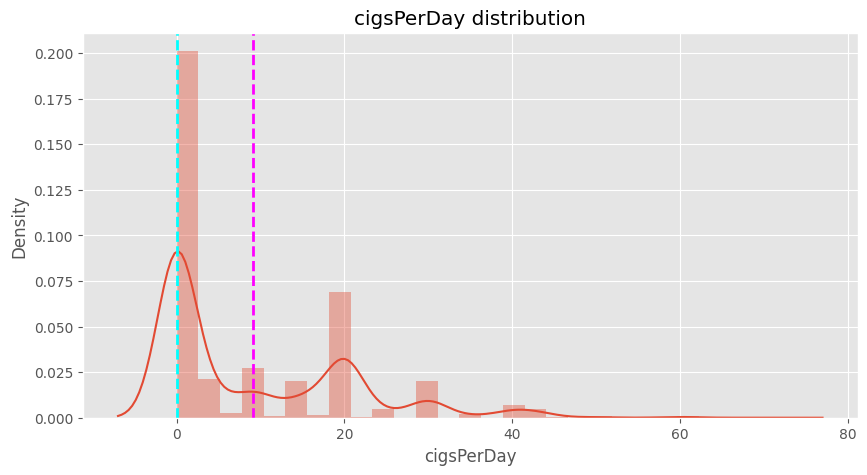

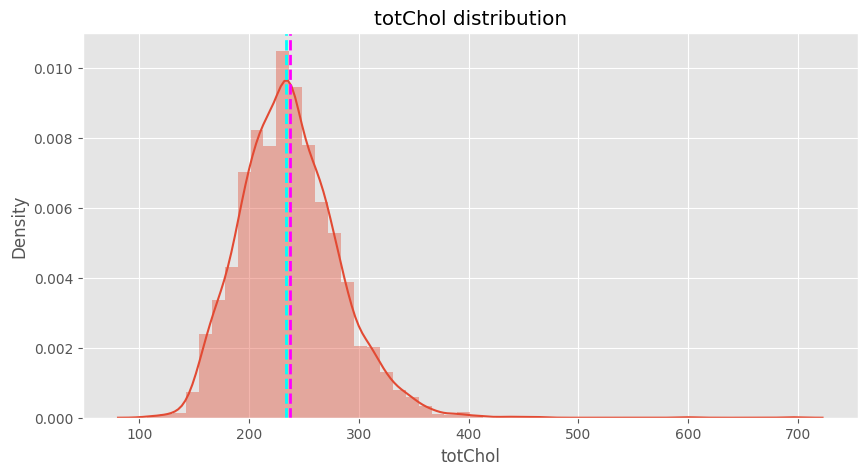

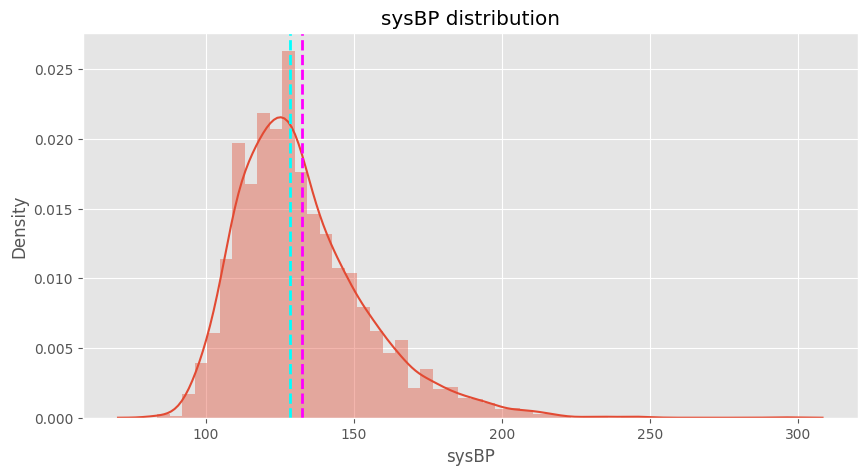

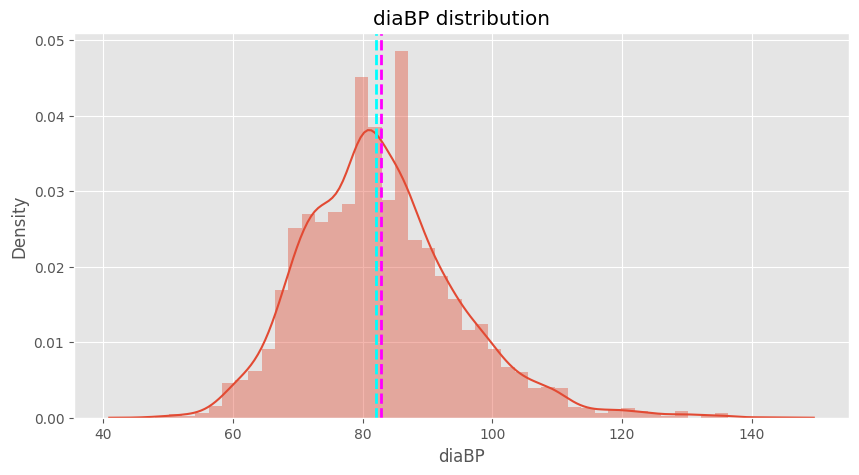

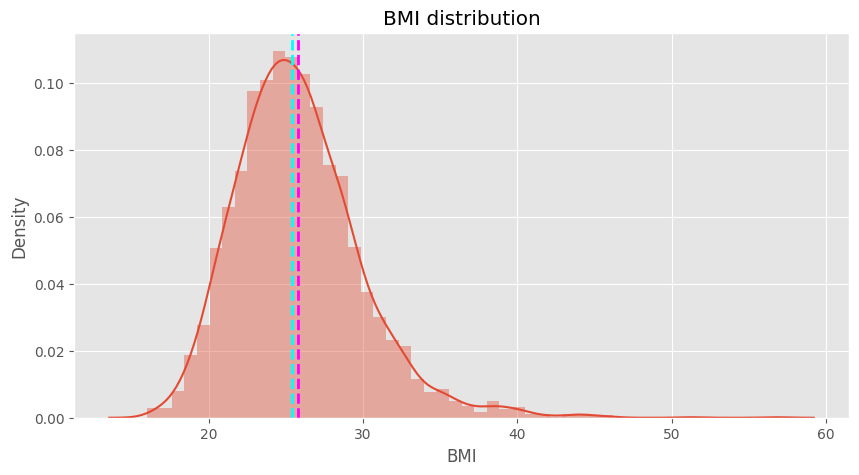

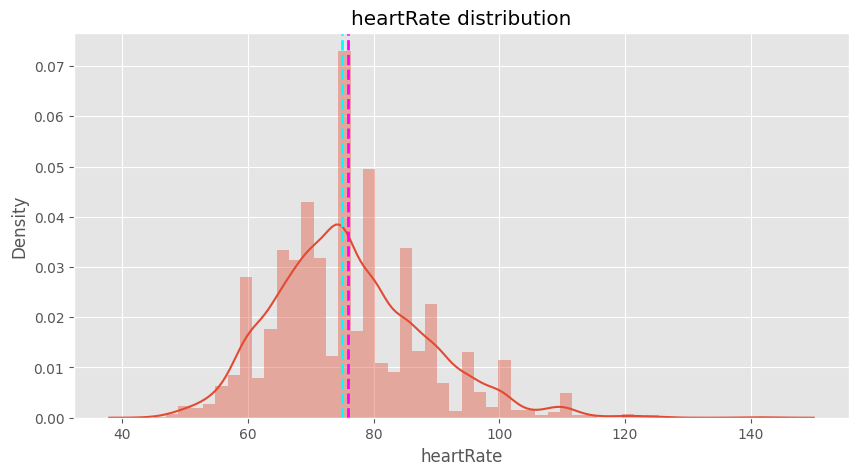

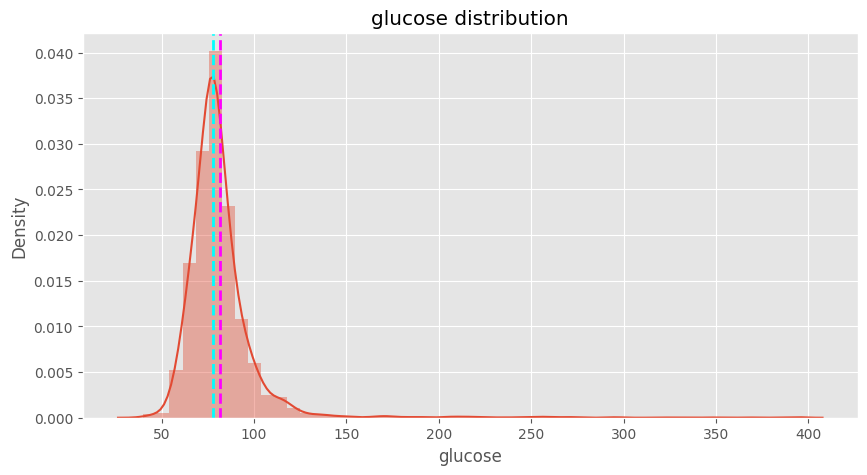

In [23]:
# Chart - 1 visualization code
# Analysing the distribution of continuous variables in the dataset
for col in continuous_variables:
  plt.figure(figsize=(10,5))
  sns.distplot(Cardio_DataFrame[col])
  plt.axvline(Cardio_DataFrame[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(Cardio_DataFrame[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

##### 1. Why did you pick the specific chart?

Histograms are effective tools for representing the distribution of numerical data. They provide a clear visual depiction of data grouped into bins, allowing us to assess patterns, outliers, and other distributional characteristics. Histograms facilitate data exploration, understanding, and communication of insights derived from the data's distribution.

##### 2. What is/are the insight(s) found from the chart?

The insights we found are :-

- **Age:** The histogram reveals that the majority of individuals in the dataset fall within the age range of 40-60 years. There are relatively fewer individuals younger than 30 or older than 70.

- **CigsPerDay:** The histogram indicates that most individuals in the dataset smoke fewer than 10 cigarettes per day. However, there are a few individuals who smoke more than 20 cigarettes per day.

- **totChol:** The histogram shows that the majority of individuals have total cholesterol levels between 200-250 mg/dL. There are relatively fewer individuals with total cholesterol levels below 160 mg/dL or above 300 mg/dL.

- **sysBP:** The histogram demonstrates that most individuals have systolic blood pressure levels ranging from 120-140 mmHg. However, there are a few individuals with systolic blood pressure levels below 90 mmHg or above 160 mmHg.

- **diaBP:** The histogram reveals that the majority of individuals have diastolic blood pressure levels between 80-90 mmHg. However, there are relatively fewer individuals with diastolic blood pressure levels below 60 mmHg or above 100 mmHg.

- **BMI:** The histogram displays that most individuals have a body mass index (BMI) between 24-26. There are a few individuals with a BMI below 18 or above 35.

- **heartRate:** The histogram suggests that the majority of individuals have a heart rate between 60-90 beats per minute. However, there are a few individuals with a heart rate below 50 beats per minute or above 100 beats per minute.

- **glucose:** The histogram indicates that most individuals have blood glucose levels ranging from 70-90 mg/dL. There are relatively fewer individuals with blood glucose levels below 60 mg/dL or above 130 mg/dL.


#### Chart - 2 - Analyzing the distribution of the discrete independent variables:

In [24]:
# Creating a function to plot countplots for categorical columns
def count_plotting(columns):
  ''' Returns subplots of countplot graphs using seaborn '''
  sns.set_style('whitegrid')
  fig, axes = plt.subplots(len(columns) , figsize=(18,50))
  
  plot_list = zip(list(range(0,len(columns)+1)), columns)

  for i , column in plot_list:
    sns.countplot(ax = axes[i], data = Cardio_DataFrame, x = column)

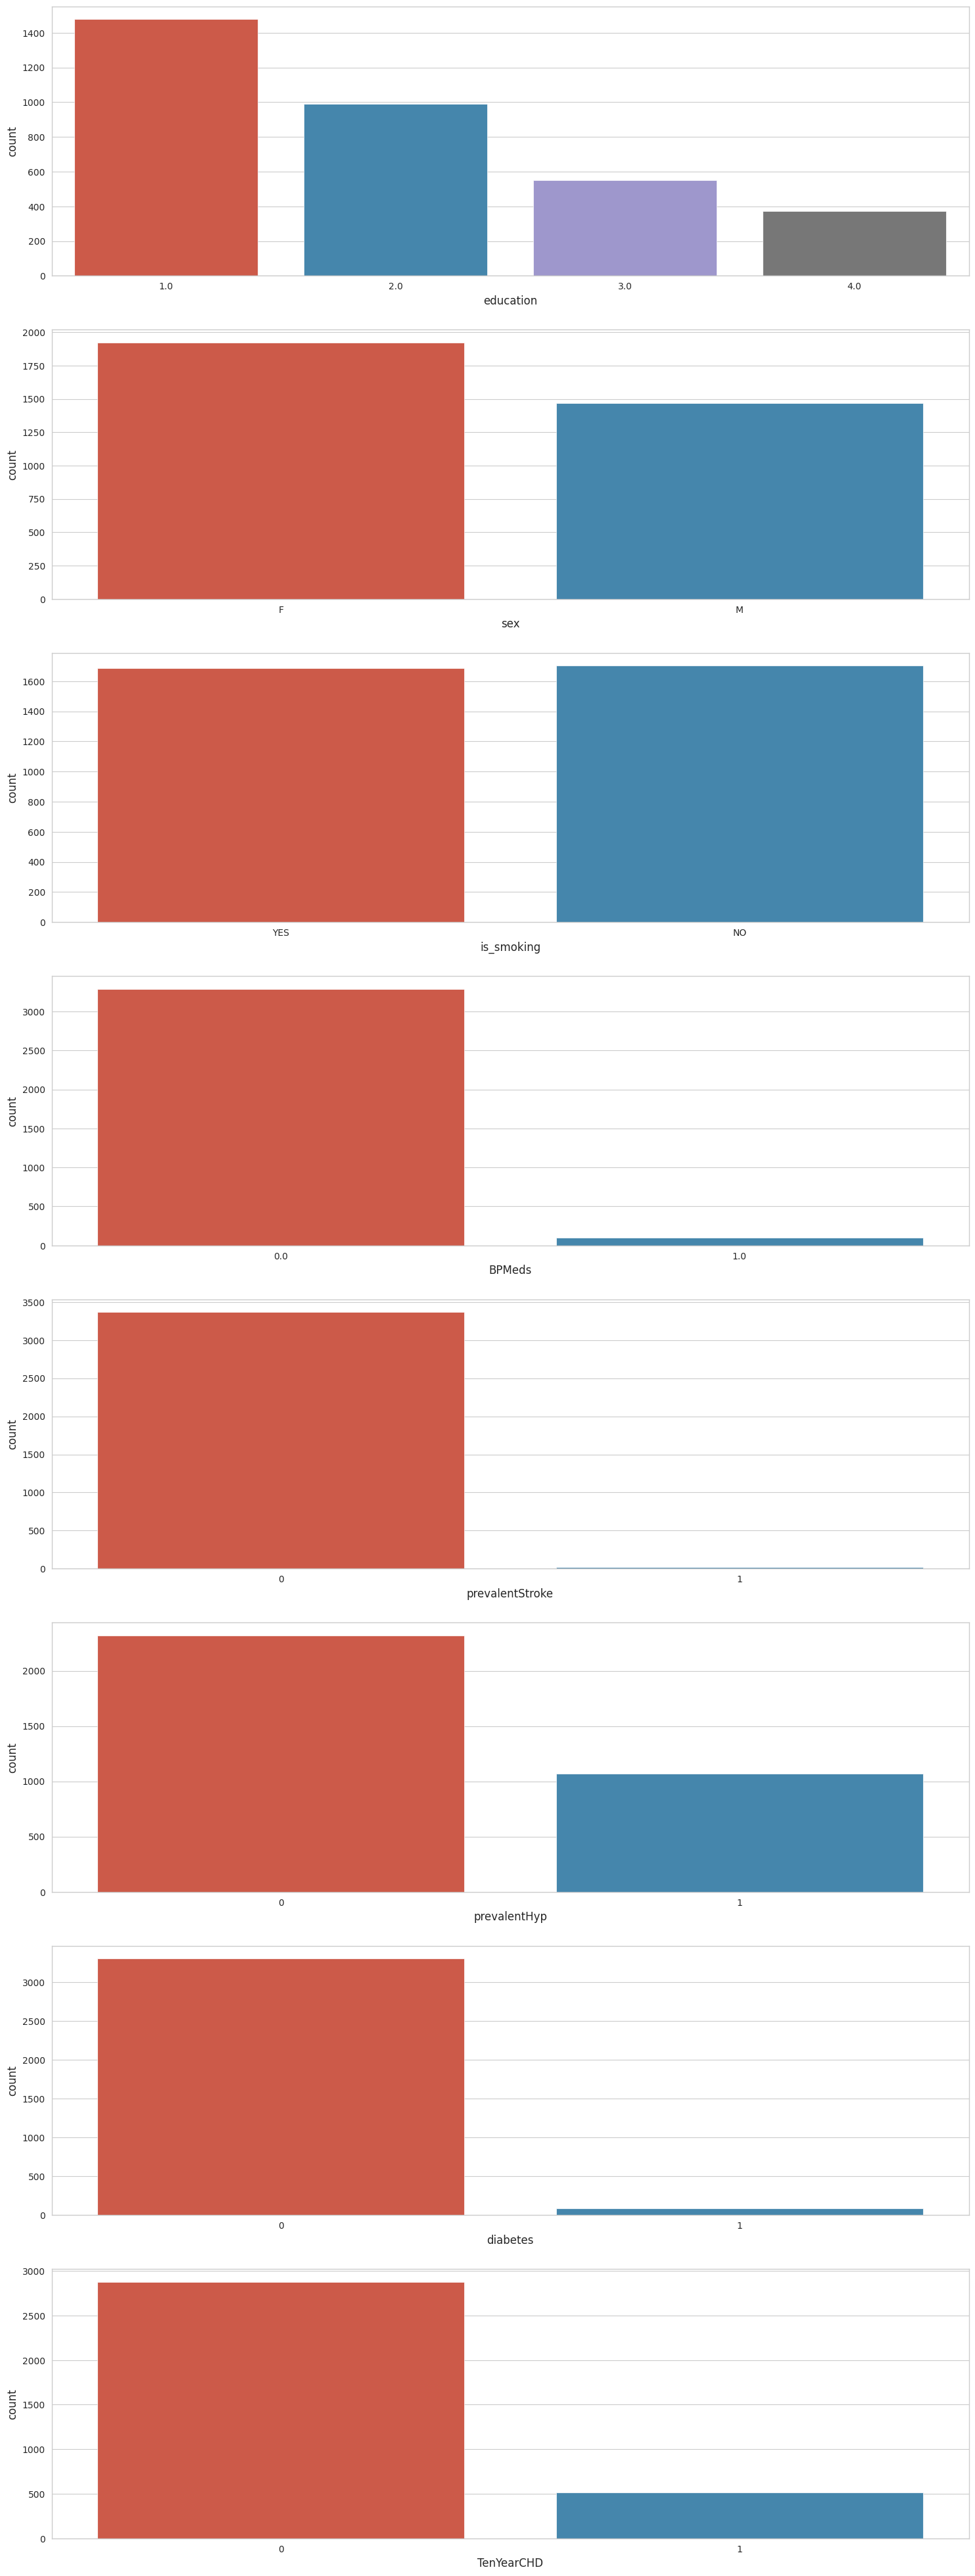

In [25]:
# Creating countplots using above function
count_plotting(categorical_variables)

##### 1. Why did you pick the specific chart?

Bar charts are a widely used and effective way to visualize and analyze categorical variables. They offer a clear and concise representation of the distribution, proportion, and relationships between categories, helping to uncover insights and patterns in the data.

##### 2. What is/are the insight(s) found from the chart?

The insights we found are :

* Females are more in proportion to men by a small margin.
* There are more non-smokers than smokers by a small margin, both are around 1600 each.
* Around 1500 people have an education level 1, and almost 400 people have an education level of 4. The levels are not defined.
* More than 3000 people are not on BP medication
* Only a small number of people have suffered a stroke previously.
* Around 1000 people were hypertensive.
* A large number (> 3000) of the people do not have diabetes.

#### Chart - 3- Analyzing the distribution of education level

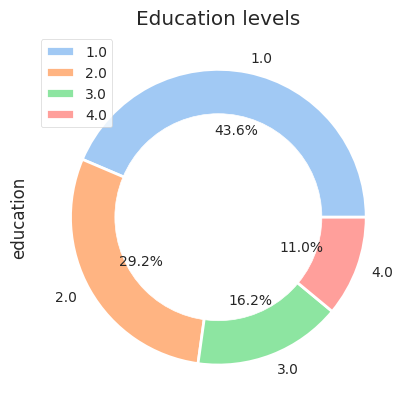

In [26]:
# Chart - 3 visualization code
# Setting labels for items in Chart
education = Cardio_DataFrame["education"].value_counts()

# Pie Chart
Cardio_DataFrame["education"].value_counts().plot.pie(colors= sns.color_palette('pastel'),legend=True,autopct = '%1.1f%%',
                                              wedgeprops = {'linewidth': 2,'antialiased': True})
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# # Adding Title of chart
plt.title('Education levels')

# Displaying Chart
plt.show()

##### 1. Why did you pick the specific chart?

The donut chart helps us visually analyze the distribution of education levels and compare them to the overall population being evaluated for cardiovascular disease risk. It enhances our ability to understand and interpret the individual dimensions within the larger context, providing valuable insights into the education levels of the individuals in the dataset.

##### 2. What is/are the insight(s) found from the chart?

Within the dataset, the majority of the population (42.1%) possesses Education Level 1, indicating the highest proportion among all education levels. On the other hand, Education Level 4 is the least prevalent, accounting for only 11.3% of the population. These statistics provide valuable insights into the distribution of education levels among the individuals in the dataset, highlighting the varying prevalence of different education level

## Bivariate Analysis

In [27]:
# Lets make a copy of original dataframe and make all features numeric in order to visualize them properly
Copy_of_DataFrame= Cardio_DataFrame.copy()

In [28]:
# Defining a label encoder based on above data
encoder = {'sex':{'M':1, 'F':0},'is_smoking':{'YES':1, 'NO': 0}}

# Label Encoding
Copy_of_DataFrame = Copy_of_DataFrame.replace(encoder)

#### Chart - 1 - Countplot of categorical features with target variable

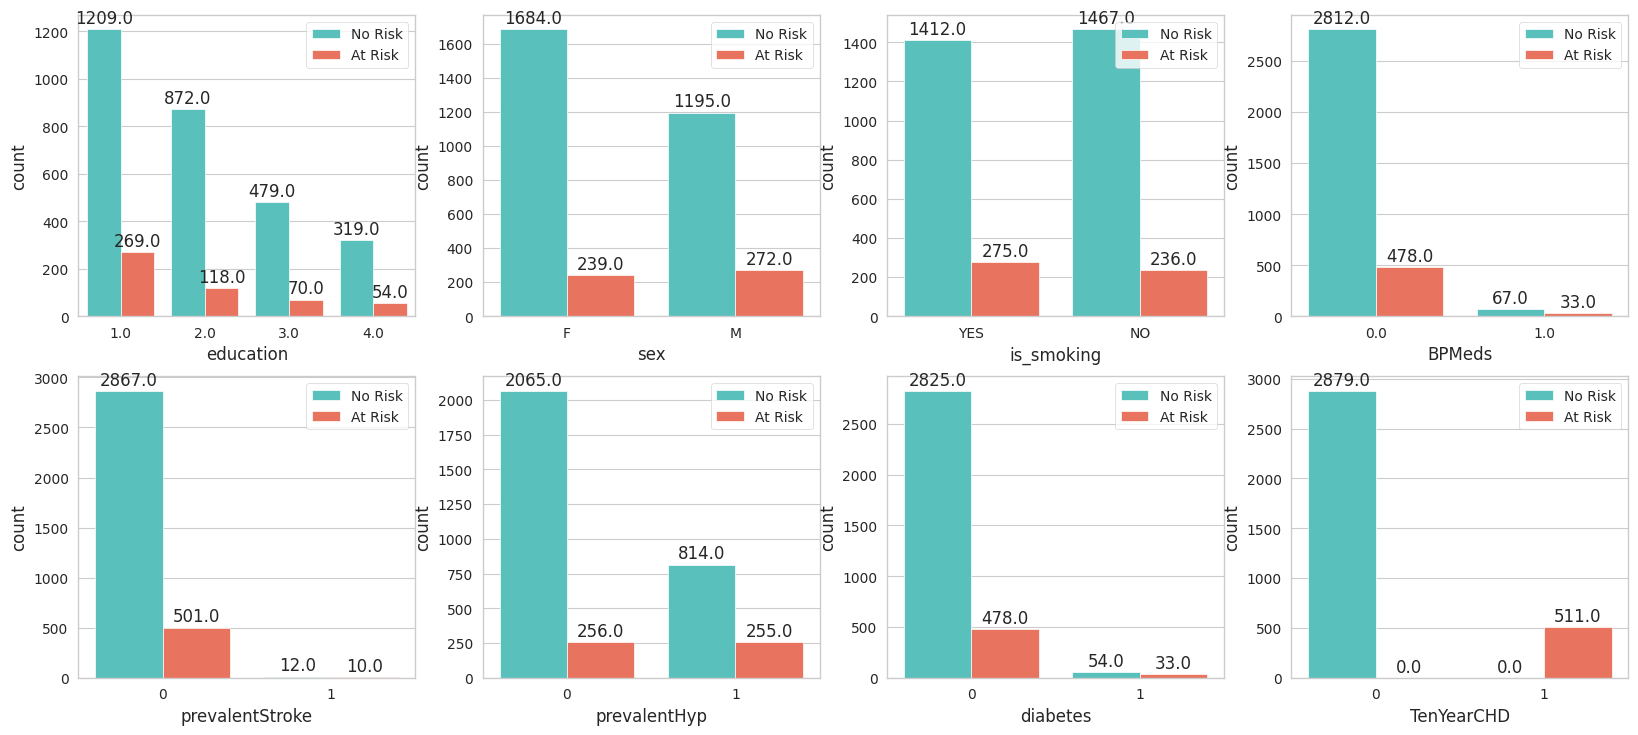

In [79]:
plt.figure(figsize=(20, 18))

for i, j in enumerate(categorical_variables):
    plt.subplot(4, 4, i+1)
    plot = sns.countplot(x=Cardio_DataFrame[j], hue=Cardio_DataFrame['TenYearCHD'], palette=['mediumturquoise', 'tomato'])
    plt.legend(['No Risk', 'At Risk'])

    for bar in plot.patches:
        height = bar.get_height()
        plot.annotate(f'{height}',
                      (bar.get_x() + bar.get_width() / 2, height),
                      ha='center', va='center',
                      size=12, xytext=(0, 8),
                      textcoords='offset points')

plt.show()


##### 1. Why did you pick the specific chart?

Above independent feature distribution bar charts have been used as Vertical bar charts are useful to compare different categorical or discrete variables as long as they are too many categories to compare.With the help of above charts we can conclude if BP problems , prevalent strokes , prevalent hypertentions and diabetes are prone to get affected by Heart Disease

##### 2. What is/are the insight(s) found from the chart?

From the above count plots , we can clearly see that BP Problems , prevalent strokes , prevalent hypertension and dieabetes does have a great impact on getting Heart Diseases.

* Residents who are at education Level-1 are having slightly more percentage of getting suffered from CHD as compared to other education levels.
* Males are more prone to CHD as compared to females.
* Smokers are having slight more chances of suffering from CHD than non-smokers.
* Residents who are not on a BP medication are having minimal chances as compared to medicated patients of suffering to CHD.
* Patients who are having stroke or hypertention history, diabetes are more prone to CHD.

#### Chart - 2 - Regression plot of feature vs Target Variable (i.e. TenYearCHD)

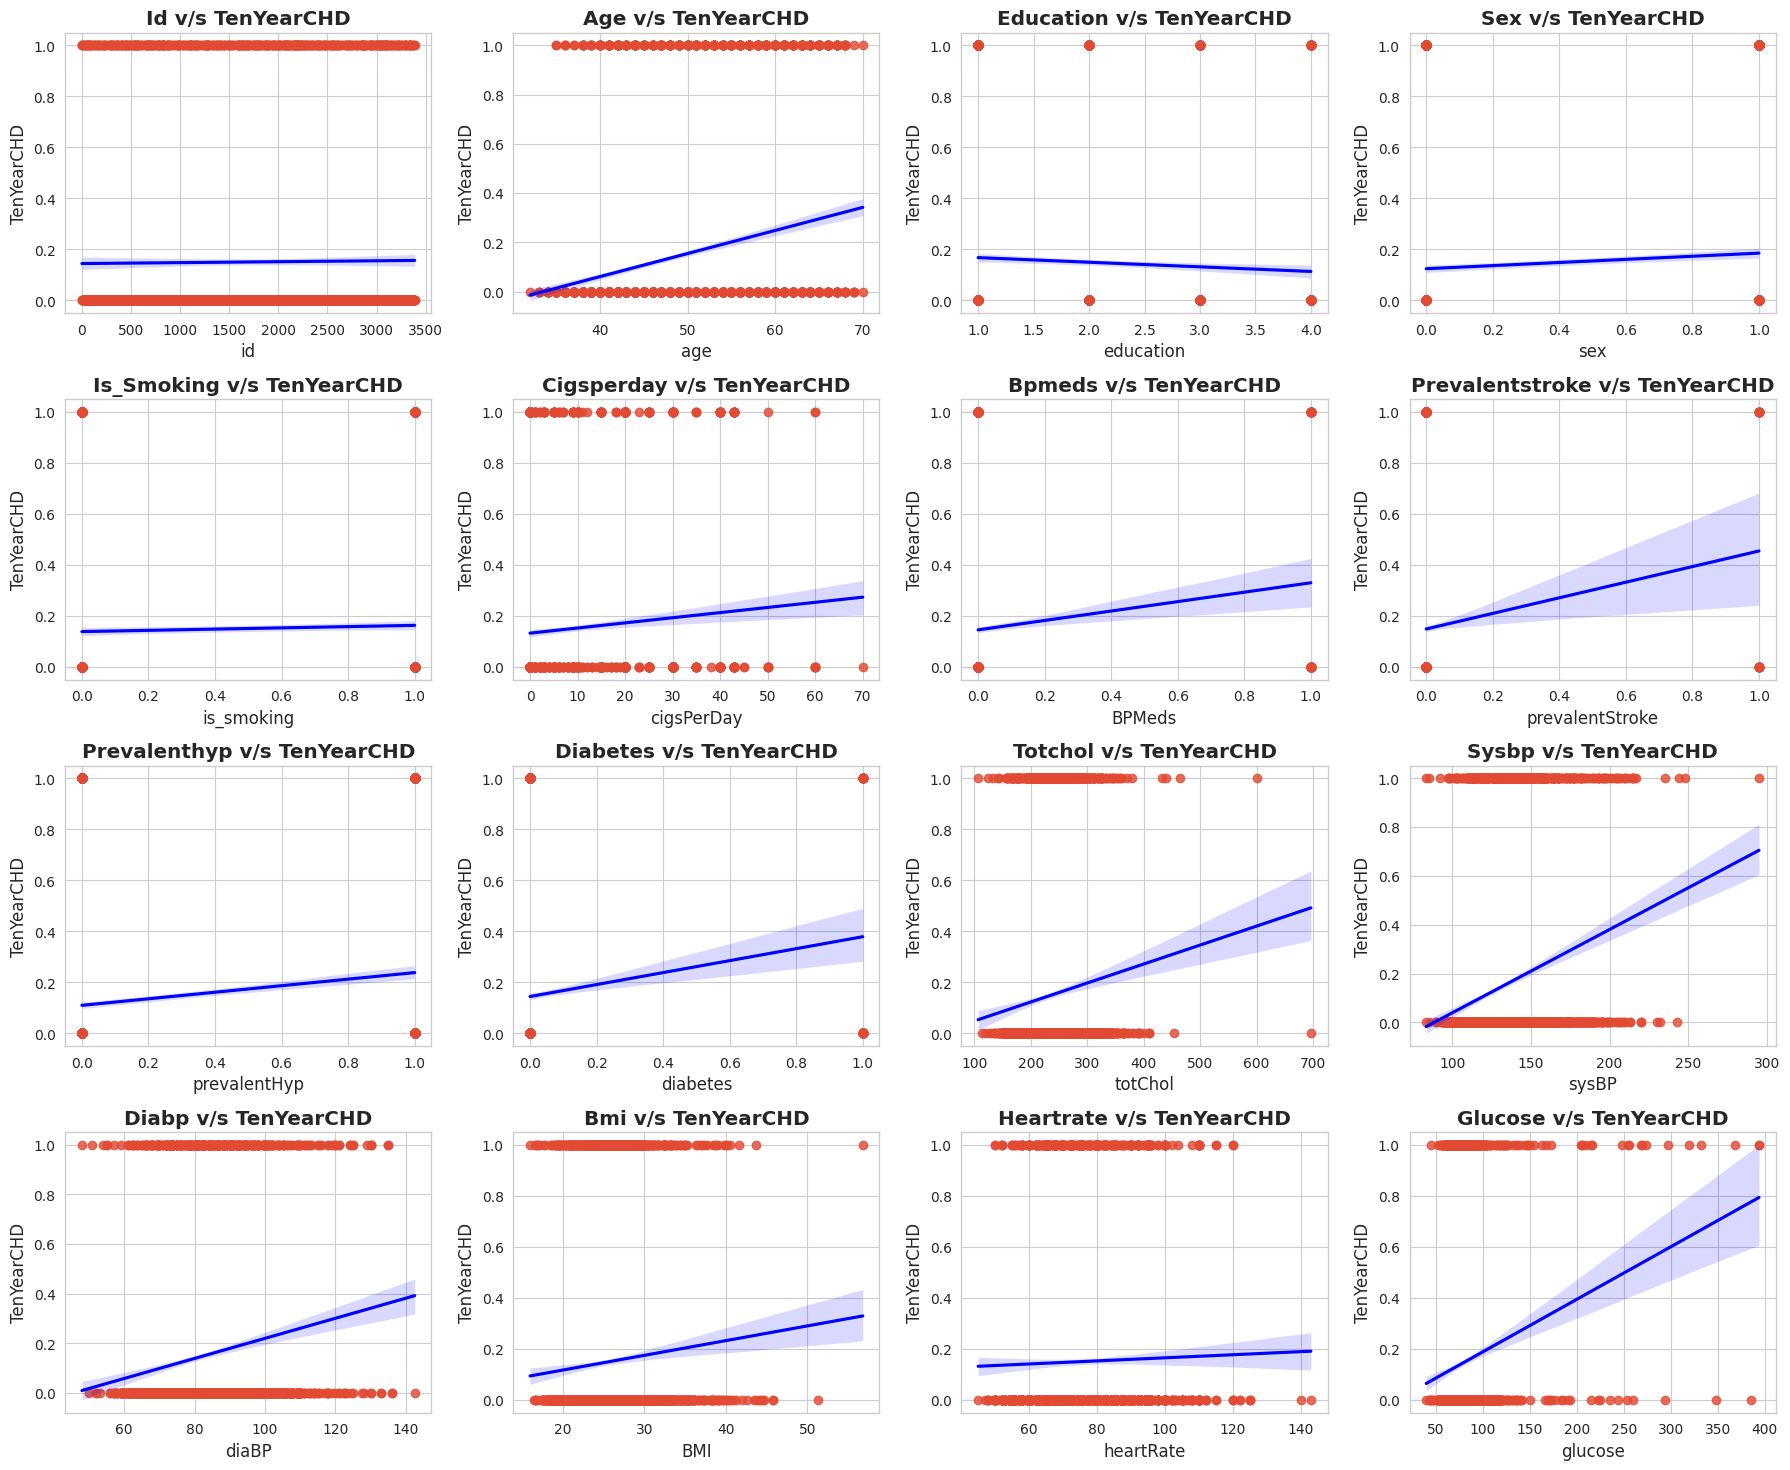

In [81]:
# Chart - 2 visualization code

plt.figure(figsize=(18,18))
for n,column in enumerate(Copy_of_DataFrame.columns[:-1] ):
  plt.subplot(5, 4, n+1)
  sns.regplot(x = Copy_of_DataFrame[column], y =Copy_of_DataFrame['TenYearCHD'],line_kws={"color": "blue"})
  plt.title(f'{column.title()} v/s TenYearCHD',weight='bold')
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

We plotted above regression plot to see correlation of various feature with respect to TenYearCHD.Regression plot is mainly used for prediction, forecasting, time series modeling, and determining the causal-effect relationship between variables.

##### 2. What is/are the insight(s) found from the chart?

Following features have a positive relation with TenYearCHD :-

* Age

* Sex

* CigsPerDay

* BPMeds

* prevalentStroke

* prevalentHYP

* Diabetes

* TotChol

* sysBP

* diaBP

* BMI

* Glucose

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By looking at above positively impacting features diagnostic or fitness company can provide mrdications or required measures for not to get affected by the CHD.

#### Chart - 3 - Scatterplot of continous correlated features

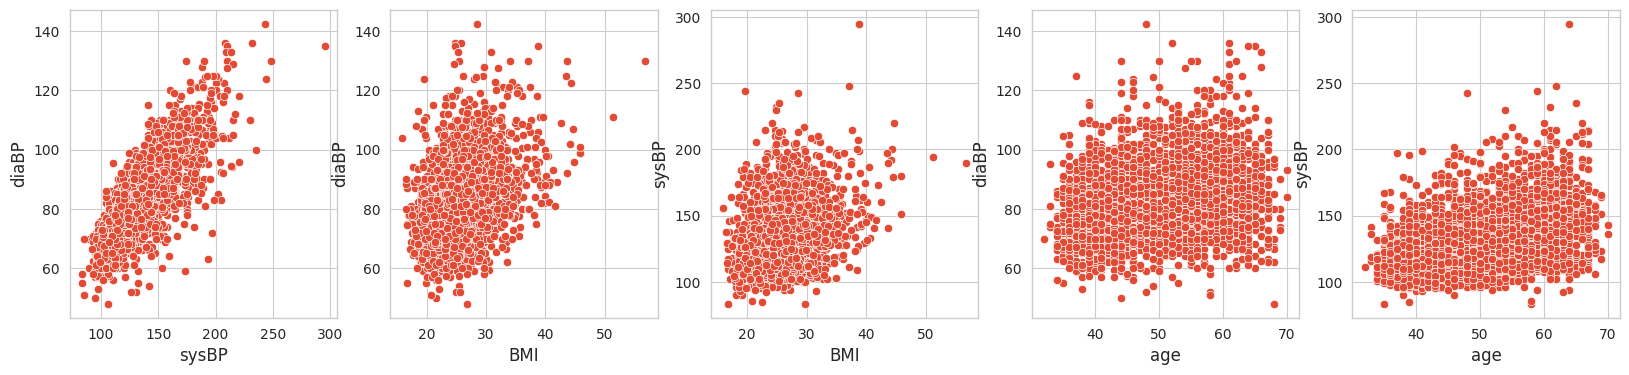

In [83]:
# Chart - 3 visualization code
plt.figure(figsize=(20, 4))

plt.subplot(1, 5, 1)
sns.scatterplot(x='sysBP', y='diaBP', data=Cardio_DataFrame)

plt.subplot(1, 5, 2)
sns.scatterplot(x='BMI', y='diaBP', data=Cardio_DataFrame)

plt.subplot(1, 5, 3)
sns.scatterplot(x='BMI', y='sysBP', data=Cardio_DataFrame)

plt.subplot(1, 5, 4)
sns.scatterplot(x='age', y='diaBP', data=Cardio_DataFrame)

plt.subplot(1, 5, 5)
sns.scatterplot(x='age', y='sysBP', data=Cardio_DataFrame)

plt.show()


##### 1. Why did you pick the specific chart?

Above distribution of continous features uses scatter plot for data representation. We have used scatterplot as they are used to determine association of variables i.e, how much one variable is affected by another.

From above plot we can visualise the relationship between :

* sysBP and diaBP

* BMI and diaBP

* BMI and sysBP

* age and diaBP

* age and sysBP

##### 2. What is/are the insight(s) found from the chart?

We see that the first three have strong positive correlation and the last two have a moderate positive correlation .

#### Chart - 7

In [32]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [33]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [34]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [35]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [36]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [37]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [38]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [39]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [40]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [41]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [42]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [43]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [44]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [45]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [46]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [47]:
# Expand Contraction

#### 2. Lower Casing

In [48]:
# Lower Casing

#### 3. Removing Punctuations

In [49]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [50]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [51]:
# Remove Stopwords

In [52]:
# Remove White spaces

#### 6. Rephrase Text

In [53]:
# Rephrase Text

#### 7. Tokenization

In [54]:
# Tokenization

#### 8. Text Normalization

In [55]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [56]:
# POS Taging

#### 10. Text Vectorization

In [57]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [58]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [59]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [60]:
# Transform Your data

### 6. Data Scaling

In [61]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [62]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [63]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [64]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [65]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [66]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [67]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [68]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [69]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [70]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [71]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [72]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [73]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [74]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***